In [15]:
import pandas as pd
from matplotlib import pyplot
import statsmodels as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
import statistics

import preprocessing_predictions as prep

In [5]:
df = prep.get_prediction_data()

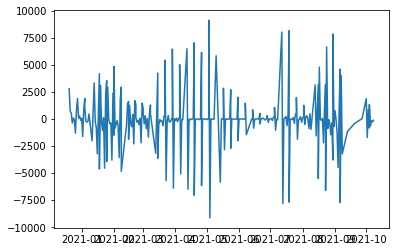

In [6]:
cases_series_diff1 = df["cases"].diff().fillna(df["cases"])

pyplot.plot(cases_series_diff1)
pyplot.show()


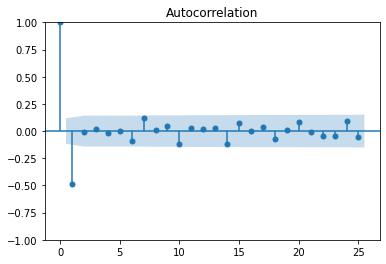

In [7]:
plot_acf(cases_series_diff1)
pyplot.show()


In [8]:
# Depending on ACF and PACF, create ARMA/ARIMA model
# with AR and MA terms
# This will infer the frequency, so make sure there are
# no gaps between datetimes
ARIMA_model_cases_series = ARIMA(cases_series_diff1, order=(5, 2, 1)).fit()
# If the p-value for a AR/MA coef is > 0.05, it's not significant
# enough to keep in the model
# Might want to re-model using only significant terms
print(ARIMA_model_cases_series.summary())

c:\Users\Tim\Development\INFOMDSS\.env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\Users\Tim\Development\INFOMDSS\.env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\Users\Tim\Development\INFOMDSS\.env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\Users\Tim\Development\INFOMDSS\.env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: Use

                               SARIMAX Results                                
Dep. Variable:                  cases   No. Observations:                  278
Model:                 ARIMA(5, 2, 1)   Log Likelihood               -2545.367
Date:                Fri, 29 Oct 2021   AIC                           5104.735
Time:                        16:14:16   BIC                           5130.078
Sample:                             0   HQIC                          5114.905
                                - 278                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3613      0.044    -31.171      0.000      -1.447      -1.276
ar.L2         -1.2939      0.082    -15.806      0.000      -1.454      -1.133
ar.L3         -0.9570      0.101     -9.514      0.0

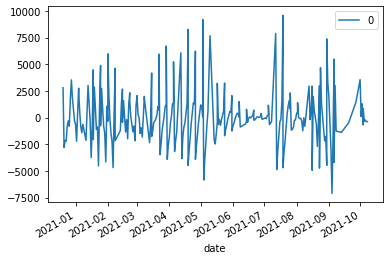

In [9]:
# line plot of residuals
residuals = pd.DataFrame(ARIMA_model_cases_series.resid)
residuals.plot()
pyplot.show()


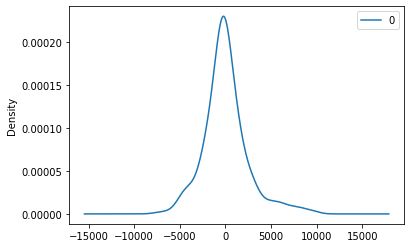

                 0
count   278.000000
mean     49.269651
std    2442.877146
min   -7114.939179
25%   -1171.748153
50%    -163.940922
75%    1048.941311
max    9574.272846


In [10]:
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [23]:
oct08 = cases_series_diff1.index[-10]
oct15 = oct08 + timedelta(days = 6)
ARIMA_predict_next_week = ARIMA_model_cases_series.predict(
    start=oct08, end= oct15,typ="levels"
)
print("Forecast/preditions for 1 week ahead ", ARIMA_predict_next_week)

Forecast/preditions for 1 week ahead  date
2021-09-27   -1410.927130
2021-10-01   -1670.670857
2021-10-02   -1803.291076
2021-10-03    -402.294958
Name: predicted_mean, dtype: float64


In [20]:
oct09 = cases_series_diff1.index[-1]
oct09

Timestamp('2021-10-08 00:00:00')